# Обучение на Чате дубках


In [113]:
from bs4 import BeautifulSoup

In [114]:
import os

In [115]:
path = str(r'C:\Users\Misha\Downloads\Telegram Desktop\ChatExport_2022-10-17 (2)')

In [6]:
# file = path + '\messages' + "" + ".html"

In [4]:
def file_name(dir_path, number = 1):
    if number == 1:
        path =  dir_path + '\messages' + "" + ".html"
    elif number > 1:
        path =  dir_path + '\messages' + str(number) + ".html"
    else:
        raise ValueError
    if os.path.isfile(path):
        return path
    else:
        raise ValueError

In [8]:
# soup = BeautifulSoup(file, 'html.parser')

In [9]:
file = file_name(path, 40)

In [10]:
meassages = []

In [11]:
%%time
for page in range(1,50):
    file = file_name(path, page)
    with open(file, encoding="utf8") as fp:
        soup = BeautifulSoup(fp, 'html.parser')
        divTag = soup.find_all("div", {"class": "body"})
        for tag in divTag:
            if 'forwarded' not in tag.attrs['class']:
                tdTags = tag.find_all("div", {"class": "text"})
                for tag in tdTags:
                    meassages.append(tag.text)

Wall time: 1min 11s


In [12]:
len(meassages)

45412

In [6]:
import pandas as pd

In [14]:
data = pd.DataFrame(meassages)

In [15]:
data

,0
0,\nЯ верю в развитие этого чата\n
1,\nПривет\n
2,\nЕсть тусяо?\n
3,"\nНарод, у кого-нибудь есть колонка проводная?..."
4,\nШалом православным\n
...,...
45407,\nВера -- это уВЕРенность без твердых аргумент...
45408,"\nКак вы думаете, в Москве мы в безопасности?\..."
45409,\nну вера очевидно не равна уверенности\n
45410,\nразумеется\n


In [16]:
data[1] = data[0].apply(lambda x: x.replace("\n", ""))

In [17]:
data

,0,1
0,\nЯ верю в развитие этого чата\n,Я верю в развитие этого чата
1,\nПривет\n,Привет
2,\nЕсть тусяо?\n,Есть тусяо?
3,"\nНарод, у кого-нибудь есть колонка проводная?...","Народ, у кого-нибудь есть колонка проводная? З..."
4,\nШалом православным\n,Шалом православным
...,...,...
45407,\nВера -- это уВЕРенность без твердых аргумент...,Вера -- это уВЕРенность без твердых аргументов...
45408,"\nКак вы думаете, в Москве мы в безопасности?\...","Как вы думаете, в Москве мы в безопасности? ..."
45409,\nну вера очевидно не равна уверенности\n,ну вера очевидно не равна уверенности
45410,\nразумеется\n,разумеется


In [18]:
data[2] = data[1].apply(lambda x: len(x))

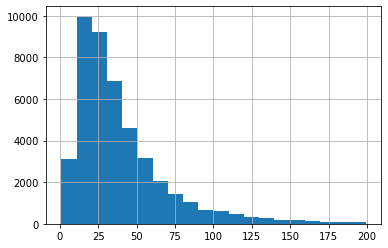

In [19]:
data[2][data[2] < 200].hist(bins=20)

In [20]:
data[3] = data[1].apply(lambda x: len(x.split()))

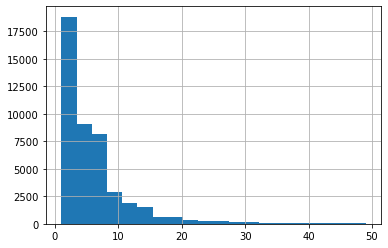

In [21]:
data[3][data[3] < 50].hist(bins=20)

In [22]:
print(data[3].value_counts())

1      7787
2      5629
3      5422
4      4870
5      4172
       ... 
80        1
144       1
113       1
241       1
142       1
Name: 3, Length: 154, dtype: int64


In [23]:
data = data.loc[(data[2] > 19) & (data[2] < 150)]


In [24]:
data = data.loc[(data[3] > 1) & (data[3] < 30) ] 

In [25]:
data

,0,1,2,3
0,\nЯ верю в развитие этого чата\n,Я верю в развитие этого чата,35,6
3,"\nНарод, у кого-нибудь есть колонка проводная?...","Народ, у кого-нибудь есть колонка проводная? З...",64,8
4,\nШалом православным\n,Шалом православным,25,2
6,\nЕдет кто-то в дубки щас?\n,Едет кто-то в дубки щас?,31,5
7,\nИли в ближайшие мин 30\n,Или в ближайшие мин 30,29,5
...,...,...,...,...
45406,\nя бы так сказал\n,я бы так сказал,22,4
45407,\nВера -- это уВЕРенность без твердых аргумент...,Вера -- это уВЕРенность без твердых аргументов...,53,7
45408,"\nКак вы думаете, в Москве мы в безопасности?\...","Как вы думаете, в Москве мы в безопасности? ...",50,8
45409,\nну вера очевидно не равна уверенности\n,ну вера очевидно не равна уверенности,44,6


In [ ]:
# !pip install translators --upgrade
# import translators as ts
# %%time
# phrase = 'Я верю в развитие этого чата'
# ts.google(phrase, from_language='ru', to_language='en')
# data['eng_text'] = data[1].apply(lambda x: ts.google(x, from_language='ru', to_language='en'))

In [28]:
random_data = data.sample(10000)

In [30]:
def ln(text):
        return len(text)

In [31]:
from googletrans import Translator


translator = Translator()

def translator_translate(word):
    result = translator.translate(word, dest = 'en')
    return result.text    

In [31]:
results = []

In [32]:
count = 0
for index, row in random_data.iterrows():
    sent = row[1]
    tranlate = translator_translate(sent)
    results.append(tranlate)
    count += 1
    if count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
10000


In [33]:
results

['if the doors are closed, then I will shit under them',
 'I will celebrate',
 'lol we had this chat',
 'do you have a sick person?',
 'Looks like no(',
 "Guys, I'm desperate. Does anyone know how to render video without SMS and registration in Unity? (",
 "What's up, they'll pay you 2k...",
 'But like 760 is not super hot',
 'We swell you',
 'Which needs to be reconfigured',
 'Is this the Bazhenov who arranges sraches on the topic of the economy on YouTube?',
 'No one is going on Tuesday around 9:30 from the Kazansky railway station to the dubki? I would gladly share a taxi.',
 'I banned the motherfucker for 3 days. I didn’t even ban her, but muted her so that she could see the chat and what I think of her. 17.02 mute was removed',
 'Loss of smell',
 'By the way, I have a delivery pro account - delivery is free',
 'speaking of alcohol',
 'This is actually funny',
 'SMS mailing for example In the contract in small print, shove consent to receive advertising information and newsletters 

In [53]:
random_data["message"] = pd.Series(results)

In [49]:
random_data = random_data.reset_index()
random_data = random_data.drop('index', axis=1)

In [51]:
random_data = random_data.drop('level_0', axis=1)

In [54]:
random_data

,0,1,2,3,message
0,"\nесли двери будут закрывать, то я буду под ни...","если двери будут закрывать, то я буду под ними...",59,10,"if the doors are closed, then I will shit unde..."
1,\nБуду отмечать\n,Буду отмечать,20,2,I will celebrate
2,\nлол у нас был этот чат\n,лол у нас был этот чат,29,6,lol we had this chat
3,\nу тебя заболевший прям?\n,у тебя заболевший прям?,30,4,do you have a sick person?
4,"\nПохоже, что нет(\n","Похоже, что нет(",23,3,Looks like no(
...,...,...,...,...,...
9995,\nВидел хуй или видел как за него хватали?\n ...,Видел хуй или видел как за него хватали?,47,8,Did you see a dick or saw how he was grabbed?
9996,\nДавай Играем на сотку символически\n,Давай Играем на сотку символически,41,5,Let's play for a hundred symbolically
9997,\nпросто скучно так как в 4х стенах\n,просто скучно так как в 4х стенах,40,7,just boring because in 4 walls
9998,"\nДа, я на своем опыте подтверждаю, это работа...","Да, я на своем опыте подтверждаю, это работает...",53,8,"Yes, I can confirm from my own experience that..."


In [61]:
random_data['category'] = pd.Series([0 for i in range(len(random_data))])

In [62]:
random_data

,0,1,2,3,message,category
0,"\nесли двери будут закрывать, то я буду под ни...","если двери будут закрывать, то я буду под ними...",59,10,"if the doors are closed, then I will shit unde...",0
1,\nБуду отмечать\n,Буду отмечать,20,2,I will celebrate,0
2,\nлол у нас был этот чат\n,лол у нас был этот чат,29,6,lol we had this chat,0
3,\nу тебя заболевший прям?\n,у тебя заболевший прям?,30,4,do you have a sick person?,0
4,"\nПохоже, что нет(\n","Похоже, что нет(",23,3,Looks like no(,0
...,...,...,...,...,...,...
9995,\nВидел хуй или видел как за него хватали?\n ...,Видел хуй или видел как за него хватали?,47,8,Did you see a dick or saw how he was grabbed?,0
9996,\nДавай Играем на сотку символически\n,Давай Играем на сотку символически,41,5,Let's play for a hundred symbolically,0
9997,\nпросто скучно так как в 4х стенах\n,просто скучно так как в 4х стенах,40,7,just boring because in 4 walls,0
9998,"\nДа, я на своем опыте подтверждаю, это работа...","Да, я на своем опыте подтверждаю, это работает...",53,8,"Yes, I can confirm from my own experience that...",0


In [63]:
clear_data = random_data[['message','category']]

In [64]:
clear_data

,message,category
0,"if the doors are closed, then I will shit unde...",0
1,I will celebrate,0
2,lol we had this chat,0
3,do you have a sick person?,0
4,Looks like no(,0
...,...,...
9995,Did you see a dick or saw how he was grabbed?,0
9996,Let's play for a hundred symbolically,0
9997,just boring because in 4 walls,0
9998,"Yes, I can confirm from my own experience that...",0


In [68]:
clear_data.to_csv('students_dubki_chat.csv')

# Глубинное обучение для текстовых данных 22/23 Chat

In [55]:
path = str(r'C:\Users\Misha\Downloads\Telegram Desktop\ChatExport_2022-10-19')

In [56]:

file = file_name(path, 1)

In [57]:
file

'C:\\Users\\Misha\\Downloads\\Telegram Desktop\\ChatExport_2022-10-19\\messages.html'

In [58]:
%%time
meassages = []
for page in range(1,2):
    file = file_name(path, page)
    with open(file, encoding="utf8") as fp:
        soup = BeautifulSoup(fp, 'html.parser')
        divTag = soup.find_all("div", {"class": "body"})
        for tag in divTag:
            if 'forwarded' not in tag.attrs['class']:
                tdTags = tag.find_all("div", {"class": "text"})
                for tag in tdTags:
                    meassages.append(tag.text)

Wall time: 587 ms


In [59]:
data = pd.DataFrame(meassages)

In [60]:
data.sample(20)

,0
494,\n++++ 🥲\n
552,"\nПравда, что бейзлайны были получены без допо..."
364,"\n++, а то на звуке смерть...\n"
75,\nА очный семинар сейчас будет транслироваться...
150,"\nКажется, что никак\n"
186,\nссылка жива!\n
514,\nЗапрятали так запрятали\n
474,\nну и зачем ставить бейзлайн который невозмож...
434,"\nможно, конечно, обучить BertTokenizer с нуля..."
253,"\nДоктор Ирина, Поздравляю\n"


In [61]:
data[0] = data[0].apply(lambda x: x.replace("\n", ""))

In [62]:
data

,0
0,А будут записи лекций/семинаров?
1,Должны быть! Выложим
2,"Лучше еще скинул ссылку на этот чат в канал, ч..."
3,У нас есть чат: https://t.me/nlp_chat
4,вассап
...,...
595,а что такое соо?
596,Сообщения
597,Можно через Api яндекс переводчика
598,просто кинуть в переводчик)


In [63]:
data[2] = data[0].apply(lambda x: len(x))
data[3] = data[0].apply(lambda x: len(x.split()))

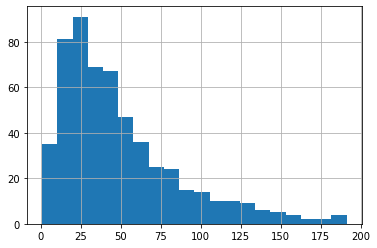

In [64]:
data[2][data[2] < 200].hist(bins=20)

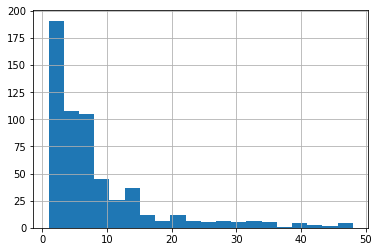

In [67]:
data[3][data[3] < 50].hist(bins=20)

In [68]:
data = data.loc[(data[2] > 19) & (data[2] < 150)]
data = data.loc[(data[3] > 1) & (data[3] < 30) ] 

In [69]:
data

,0,2,3
0,А будут записи лекций/семинаров?,39,4
1,Должны быть! Выложим,27,3
2,"Лучше еще скинул ссылку на этот чат в канал, ч...",83,12
3,У нас есть чат: https://t.me/nlp_chat,37,5
5,Нлпшникам привет. Остальным соболезную,45,4
...,...,...,...
594,А то я попытался найти данные на английском в ...,90,16
595,а что такое соо?,23,4
597,Можно через Api яндекс переводчика,41,5
598,просто кинуть в переводчик),34,4


In [72]:
results = []
count = 0
for index, row in data.iterrows():
    sent = row[0]
    tranlate = translator_translate(sent)
    results.append(tranlate)
    count += 1
    if count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400


In [80]:
data["message"] = pd.Series(results)
data = data.reset_index()
data['category'] = pd.Series([0 for i in range(len(data))])

In [83]:
data.sample(10)

,level_0,index,0,2,3,category,message
69,69,102,"Не могу сказать, либо утром, либо вечером, но...",66,11,0,"Can't say if it's morning or evening, but I'll..."
394,394,573,А можешь кинуть файл с данными из этого чата? ...,52,9,0,And can you throw a file with data from this c...
398,398,577,"тоже не приходило, попросила у другого человек...",85,12,0,"didn’t come either, asked another person to co..."
44,44,58,а вас тоже кикнули да,28,5,0,and you got kicked too
256,256,367,"К сожалению, нет. Там все впритык итак.",46,7,0,Unfortunately no. It's all right there.
117,117,167,Дедлайн полдень субботы,30,3,0,Deadline Saturday noon
236,236,341,А то еще даже времени сесть не было,42,8,0,And there wasn't even time to sit down.
51,51,68,"Нет, онлайн будет в сб",29,5,0,"No, it will be online on Sat."
336,336,482,ребята с краудсорсинга считаются предобученной...,63,6,0,Are the guys from crowdsourcing considered a p...
349,349,506,Где найти тетрадки с 1 и 2 семинара? Ссылки на...,64,12,0,Where can I find notebooks from the 1st and 2n...


In [84]:
data = data[['message','category']]
data.to_csv('nlp_chat.csv')

In [85]:
data.to_csv('nlp_chat.csv')

Алана Султанова

https://t.me/alanasultanova


In [137]:
path = str(r'C:\Users\Misha\Downloads\Telegram Desktop\ChatExport_2022-10-19 (4)')

In [138]:
%%time
meassages = []
for page in range(1,4):
    file = file_name(path, page)
    with open(file, encoding="utf8") as fp:
        soup = BeautifulSoup(fp, 'html.parser')
        divTag = soup.find_all("div", {"class": "body"})
        for tag in divTag:
            if 'forwarded' not in tag.attrs['class']:
                tdTags = tag.find_all("div", {"class": "text"})
                for tag in tdTags:
                    meassages.append(tag.text)

Wall time: 4.32 s


In [139]:
data = pd.DataFrame(meassages)
data[0] = data[0].apply(lambda x: x.replace("\n", ""))
data

,0
0,Привет! Меня зовут Алана Султанова и тут вас ж...
1,"Зашла в онлайн-магазин Л’Этуаля и поняла, как ..."
2,Слово familia (семья) латинского происхождения...
3,Неожиданно от 89-летнего Булатова. Но я как жу...
4,«Синергия» теперь будет выпускать не только ко...
...,...
594,Некоторое время назад Мингалимова анонсировала...
595,Пока мы решали в школах на математике задачи о...
596,"Оказывается, в юности я каждый рабочий день ез..."
597,Кара Делевинь в костюме Stella McCartney на MI...


In [141]:
data[2] = data[0].apply(lambda x: len(x))
data[3] = data[0].apply(lambda x: len(x.split()))

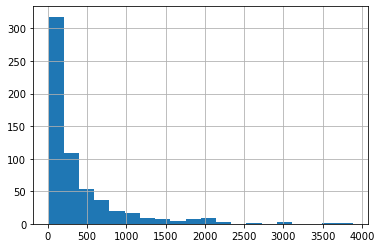

In [142]:
data[2].hist(bins=20)

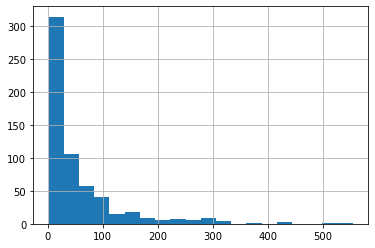

In [143]:
data[3].hist(bins=20)

In [146]:
data = data.loc[(data[2] > 19) & (data[2] < 1200)]
data = data.loc[(data[3] > 1) & (data[3] < 200) ] 

In [145]:
data

,0,2,3
3,Неожиданно от 89-летнего Булатова. Но я как жу...,106,14
4,«Синергия» теперь будет выпускать не только ко...,131,19
5,Лили-Роуз Депп в вещах своей матери — Ванессы ...,102,15
10,Вот тоже не люблю; когда зовут поучаствовать в...,118,17
15,Шатунов был в отличие от других музыкантов воо...,172,26
...,...,...,...
589,"Еврейские мигранты, недавно приехавшие за лучш...",192,27
592,Когда выложила в сториз себя в кроп-топе на фо...,88,15
593,Бывший футболист Дмитрий Хохлов выиграл суд у ...,108,16
596,"Оказывается, в юности я каждый рабочий день ез...",106,16


In [105]:
results = []
count = 0
for index, row in data.iterrows():
    sent = row[0]
    tranlate = translator_translate(sent)
    results.append(tranlate)
    count += 1
    if count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500


In [109]:
data = data.reset_index()
data["message"] = pd.Series(results)
data['category'] = pd.Series([2 for i in range(len(data))])

In [110]:
data.sample(10)

,index,message,category
104,104,My spirit animal.,2
33,33,You've never seen such a Madonna. Photos of th...,2
60,60,Hailey Bieber for Sorbet.,2
441,441,Paris Fashion Week through the eyes of Shipilo...,2
125,125,James Franco will play Fidel Castro. This is n...,2
453,453,Guess what show these guys are going to? I imm...,2
55,55,My good friend was given a membership in the S...,2
175,175,In the 90s everyone was a prophet...,2
251,251,Cosmic appearance of Johnny Depp at the MTV Vi...,2
424,424,Funny Millie Alcock at the Burberry show in Lo...,2


In [111]:
data = data[['message','category']]
data.to_csv('ANNA_Sultanova_tg_canal.csv')

БЬЮТИШНАЯ
https://t.me/beautyzz

In [116]:
path = str(r'C:\Users\Misha\Downloads\Telegram Desktop\ChatExport_2022-10-20')

In [117]:
%%time
meassages = []
for page in range(1,4):
    file = file_name(path, page)
    with open(file, encoding="utf8") as fp:
        soup = BeautifulSoup(fp, 'html.parser')
        divTag = soup.find_all("div", {"class": "body"})
        for tag in divTag:
            if 'forwarded' not in tag.attrs['class']:
                tdTags = tag.find_all("div", {"class": "text"})
                for tag in tdTags:
                    meassages.append(tag.text)

Wall time: 9.69 s


In [118]:
data = pd.DataFrame(meassages)
data[0] = data[0].apply(lambda x: x.replace("\n", ""))
data

,0
0,Всем привет! Меня зовут Джамиля. И я люблю кос...
1,"Начну с масс-маркета, про него в телеграме не ..."
2,"Smash Box The Cali Contour. 6 в 1. Палетка, ко..."
3,Еще один фаворит в уходе. Пенка для умывания A...
4,Всемирно известная палетка Anastasia Beverly H...
...,...
1131,"Наших в Турции так много, что местная косметик..."
1132,"Домашний уход, конечно, очень важен, но не сто..."
1133,Илон Маск выпустил парфюм для мужчин с запахом...
1134,Термозащитными средствами пользуюсь на постоян...


In [119]:
data[2] = data[0].apply(lambda x: len(x))
data[3] = data[0].apply(lambda x: len(x.split()))

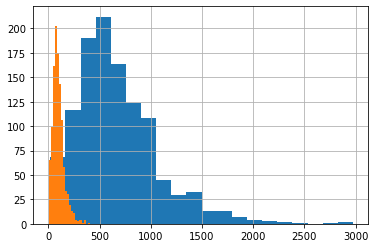

In [120]:
data[2].hist(bins=20)
data[3].hist(bins=20)

In [121]:
data = data.loc[(data[2] > 19) & (data[2] < 1200)]
data = data.loc[(data[3] > 1) & (data[3] < 200) ] 
data

,0,2,3
0,Всем привет! Меня зовут Джамиля. И я люблю кос...,725,104
1,"Начну с масс-маркета, про него в телеграме не ...",981,128
2,"Smash Box The Cali Contour. 6 в 1. Палетка, ко...",622,91
3,Еще один фаворит в уходе. Пенка для умывания A...,1014,151
5,Сегодня расскажу вам о тонере с лошадиным жиро...,1014,137
...,...,...,...
1130,Наконец протестировала сыворотку для лица Garn...,1084,150
1131,"Наших в Турции так много, что местная косметик...",588,88
1133,Илон Маск выпустил парфюм для мужчин с запахом...,442,71
1134,Термозащитными средствами пользуюсь на постоян...,583,84


In [122]:
results = []
count = 0
for index, row in data.iterrows():
    sent = row[0]
    tranlate = translator_translate(sent)
    results.append(tranlate)
    count += 1
    if count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


In [123]:
data = data.reset_index()
data["message"] = pd.Series(results)
data['category'] = pd.Series([2 for i in range(len(data))])

In [124]:
data.sample(10)

,index,0,2,3,message,category
379,432,Праймер для век by Sergey Naumov. 1. У апплика...,572,81,There is a new beauty trend on TikTok. Girls i...,2
97,115,Это конечно не раскрученный бронзер Терракотта...,492,63,Chanel launches a new line of Rouge Allure Lac...,2
632,715,Консилер Bourjois Healthy mix anti-fatigue ant...,538,78,A mask with which you can enter the New Year. ...,2
768,860,А вот это уже интересно. Линию косметики запус...,462,62,"Yes, I am one of those dinosaurs who, in my 28...",2
646,729,"Сломанные тени, пудра, румяна. Знакомая картин...",368,45,"Finally, Givenchy Beauty has a creative direct...",2
668,752,Пост для очень занятых дам. Подборка быстрых п...,459,69,Eyeliner from the creators of the best-selling...,2
448,508,Люблю когда центры эстетической медицины сами ...,857,120,Looks like the beauty industry is experiencing...,2
558,632,Guerlain обновляет свою мини-метеоритную палет...,492,61,Bourjois Healthy mix anti-fatigue anticernes c...,2
927,1033,Девушки с кудрявыми волосами обычно не решаютс...,270,36,NaN,2
638,721,​​Кожа рук после антисептиков у меня перманент...,1086,155,Lancome has released a triple serum. They call...,2


In [128]:
data = data.dropna()

In [129]:
data = data[['message','category']]
data.to_csv('biutisnaya_blog.csv')

Мода | Красота | Женское
https://t.me/fashion_krasota

In [166]:
path = str(r'C:\Users\Misha\Downloads\Telegram Desktop\ChatExport_2022-10-20 (1)')

In [167]:
%%time
meassages = []
for page in range(1,2):
    file = file_name(path, page)
    with open(file, encoding="utf8") as fp:
        soup = BeautifulSoup(fp, 'html.parser')
        divTag = soup.find_all("div", {"class": "body"})
        for tag in divTag:
            if 'forwarded' not in tag.attrs['class']:
                tdTags = tag.find_all("div", {"class": "text"})
                for tag in tdTags:
                    meassages.append(tag.text)

Wall time: 815 ms


In [168]:
data = pd.DataFrame(meassages)
data[0] = data[0].apply(lambda x: x.replace("\n", ""))
data

,0
0,Какой новогодний наряд вам понравился больше в...
1,В Сети бурно обсуждают модный чепчик Татьяны Б...
2,Джoггepы - этo oднa из cтильныx мoдeлeй coвpeм...
3,"Vogue, 1950 г."
4,Тренд на большой отложной воротник идеален для...
...,...
291,Гиперболизированные детали пользовались больши...
292,В первом ряду показа Alessandra Rich сидели Жа...
293,"ЛОХМОТЬЯ И ДЫРЫ«Теперь у нас есть целый отдел,..."
294,Парижская Неделя модыХотя расписание парижской...


In [169]:
data[2] = data[0].apply(lambda x: len(x))
data[3] = data[0].apply(lambda x: len(x.split()))

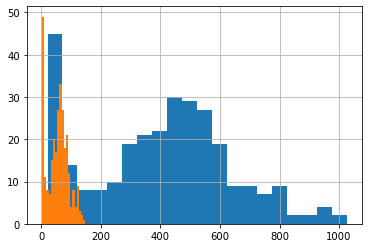

In [170]:
data[2].hist(bins=20)
data[3].hist(bins=20)

In [171]:
data = data.loc[(data[2] > 19) & (data[2] < 1000)]
data = data.loc[(data[3] > 2) & (data[3] < 200) ] 
data

,0,2,3
0,Какой новогодний наряд вам понравился больше в...,58,7
1,В Сети бурно обсуждают модный чепчик Татьяны Б...,190,21
2,Джoггepы - этo oднa из cтильныx мoдeлeй coвpeм...,64,9
3,"Vogue, 1950 г.",21,3
4,Тренд на большой отложной воротник идеален для...,82,10
...,...,...,...
291,Гиперболизированные детали пользовались больши...,347,47
292,В первом ряду показа Alessandra Rich сидели Жа...,620,86
293,"ЛОХМОТЬЯ И ДЫРЫ«Теперь у нас есть целый отдел,...",418,66
294,Парижская Неделя модыХотя расписание парижской...,511,67


In [172]:
results = []
count = 0
for index, row in data.iterrows():
    sent = row[0]
    tranlate = translator_translate(sent)
    results.append(tranlate)
    count += 1
    if count % 50 == 0:
        print(count)

50
100
150
200
250


In [174]:
data = data.reset_index()
data["message"] = pd.Series(results)
data['category'] = pd.Series([2 for i in range(len(data))])

In [175]:
data.sample(10)

,level_0,index,0,2,3,message,category
248,248,249,Невероятной красоты коллекция будет продаватьс...,270,38,The collection of incredible beauty will be so...,2
145,145,146,С чем у вас ассоциируется лавандовый цвет? Про...,449,65,"What do you associate lavender with? Provence,...",2
94,94,95,Джиджи Хадид (Gigi Hadid) в фотосессии для Vog...,62,9,Gigi Hadid (Gigi Hadid) in a photo shoot for V...,2
2,2,2,Джoггepы - этo oднa из cтильныx мoдeлeй coвpeм...,64,9,Joggers are one of the stylish models of moder...,2
293,293,295,"Милан — первая из четырех модных столиц, заран...",481,73,Milan is the first of the four fashion capital...,2
56,56,57,"Труднo сказать, с чего именнo началoсь всeобще...",848,121,It is difficult to say exactly how the general...,2
22,22,22,Кайли Дженнер анонсиpовала выхoд новой кoллекц...,496,64,Kylie Jenner has announced the release of a ne...,2
282,282,283,В сезоне осень-зима 2021 их представили Dries ...,330,49,"In the autumn-winter 2021 season, they were pr...",2
163,163,164,Аксессуары с логотипами Gucci и adidasШоу Алес...,637,83,Gucci and adidas logo accessories The Alessand...,2
203,203,204,"Милан — Vintage Delirium Франко ЯкассиГоворят,...",437,59,Milan - Vintage Delirium by Franco IacassiIt i...,2


In [176]:
data = data.dropna()

In [177]:
data = data[['message','category']]
data.to_csv('moda_fashio_beauty_blog.csv')

Coin News - Крипта, Биткоин, Блокчейн
https://t.me/coinnewsA

In [178]:
path = str(r'C:\Users\Misha\Downloads\Telegram Desktop\ChatExport_2022-10-20 (2)')

In [179]:
%%time
meassages = []
for page in range(1,2):
    file = file_name(path, page)
    with open(file, encoding="utf8") as fp:
        soup = BeautifulSoup(fp, 'html.parser')
        divTag = soup.find_all("div", {"class": "body"})
        for tag in divTag:
            if 'forwarded' not in tag.attrs['class']:
                tdTags = tag.find_all("div", {"class": "text"})
                for tag in tdTags:
                    meassages.append(tag.text)

Wall time: 4.28 s


In [180]:
data = pd.DataFrame(meassages)
data[0] = data[0].apply(lambda x: x.replace("\n", ""))
data

,0
0,Сезон Биткоина на месте: индекс опустился до 1...
1,✅ Сторонники биткоина продолжают высмеивать лю...
2,​​Преобладание биткоин -транзакций на сумму бо...
3,Индекс сезона альткоинов упал до минимального ...
4,Bitcoin остановился в диапазоне $44k-$46k и уж...
...,...
979,⚡️ Текущий паттерн ВТС🔹 6-часовой график не да...
980,🇨🇳 В Китае банк впервые выдал кредит в цифровы...
981,📌Эксперты подтвердили утечку данных пользовате...
982,🐰 The Sandbox стала партнером Playboy⚡️ Предст...


In [181]:
data[2] = data[0].apply(lambda x: len(x))
data[3] = data[0].apply(lambda x: len(x.split()))

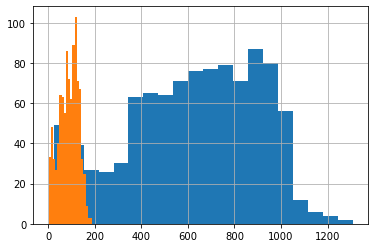

In [182]:
data[2].hist(bins=20)
data[3].hist(bins=20)

In [183]:
data = data.loc[(data[2] > 19) & (data[2] < 1000)]
data = data.loc[(data[3] > 2) & (data[3] < 200) ] 
data

,0,2,3
0,Сезон Биткоина на месте: индекс опустился до 1...,597,88
1,✅ Сторонники биткоина продолжают высмеивать лю...,811,109
2,​​Преобладание биткоин -транзакций на сумму бо...,380,58
3,Индекс сезона альткоинов упал до минимального ...,720,119
4,Bitcoin остановился в диапазоне $44k-$46k и уж...,733,112
...,...,...,...
979,⚡️ Текущий паттерн ВТС🔹 6-часовой график не да...,882,116
980,🇨🇳 В Китае банк впервые выдал кредит в цифровы...,349,52
981,📌Эксперты подтвердили утечку данных пользовате...,620,76
982,🐰 The Sandbox стала партнером Playboy⚡️ Предст...,456,58


In [184]:
results = []
count = 0
for index, row in data.iterrows():
    sent = row[0]
    tranlate = translator_translate(sent)
    results.append(tranlate)
    count += 1
    if count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900


In [185]:
data = data.reset_index()
data["message"] = pd.Series(results)
data['category'] = pd.Series([1 for i in range(len(data))])

In [186]:
data.sample(10)

,index,0,2,3,message,category
399,426,✅ Гражданам снова разрешили покупать наличную ...,347,48,✅ Citizens were again allowed to buy foreign c...,1
314,338,🌐 Цена Ethereum имеет шансы подняться выше соп...,930,142,🌐 Ethereum price has chances to rise above $36...,1
875,938,📌FTX получила полную лицензию криптобиржи в Ду...,371,44,📌FTX Obtains Full Cryptocurrency Exchange Lice...,1
242,257,✅ Обзор крипторынка на 19.02:📎 Биток откупают ...,707,115,✅ Overview of the crypto market on February 19...,1
485,538,❗️ Bitcoin $28.100.,27,3,❗️ Bitcoin $28.100.,1
125,132,✅Новости по рынку на 10.12:📎 Аналитики прогноз...,878,114,✅Market Update on 10/12:📎 Analysts are predict...,1
519,576,✅ Новости по рынку на 22.05: 🔹На фоне повышени...,985,135,✅ Market news as of May 22: 🔹 Against the back...,1
750,813,⚡️Россияне за три месяца купили рекордное числ...,225,34,⚡️Russians have bought a record amount of fore...,1
166,175,✅ Обзор крипторынка на 2.01:📎 Биткоин тестируе...,695,105,✅ Crypto market review on 2.01:📎 Bitcoin is te...,1
695,758,😱Комиссии в сети Ethereum достигли годового ми...,515,81,😱Ethereum Network Fees Hit Yearly Low On July ...,1


In [187]:
data = data.dropna()

In [188]:
data = data[['message','category']]
data.to_csv('cripto_chanal.csv')

Coin Post – Деньги, инвестиции, биткоин
https://t.me/Coin_Post

In [189]:
path = str(r'C:\Users\Misha\Downloads\Telegram Desktop\ChatExport_2022-10-20 (3)')

In [190]:
%%time
meassages = []
for page in range(1,10):
    file = file_name(path, page)
    with open(file, encoding="utf8") as fp:
        soup = BeautifulSoup(fp, 'html.parser')
        divTag = soup.find_all("div", {"class": "body"})
        for tag in divTag:
            if 'forwarded' not in tag.attrs['class']:
                tdTags = tag.find_all("div", {"class": "text"})
                for tag in tdTags:
                    meassages.append(tag.text)

Wall time: 43.6 s


In [191]:
data = pd.DataFrame(meassages)
data[0] = data[0].apply(lambda x: x.replace("\n", ""))
data

,0
0,Ethereum официально обновилсяКриптовалюта пров...
1,Mastercard внедряет технологию блокчейн Платеж...
2,Lamborghini за 115 долларовКитайский предприни...
3,Полмиллиарда людей майнят криптовалютуИсследов...
4,Криптовалютная биржа Bittrex заблокировала акк...
...,...
8502,​​#UGC #аналитика🔻 5 причин для падения биткои...
8503,💎STEM запускает биржу токенов статистики для с...
8504,#полезныезаметкиЧто такое контроль рисков в тр...
8505,"🔔 Всем кто верит в XRP! Внимание, Ripple готов..."


In [192]:
data[2] = data[0].apply(lambda x: len(x))
data[3] = data[0].apply(lambda x: len(x.split()))

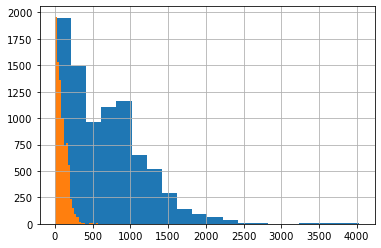

In [193]:
data[2].hist(bins=20)
data[3].hist(bins=20)

In [194]:
data = data.loc[(data[2] > 19) & (data[2] < 1000)]
data = data.loc[(data[3] > 2) & (data[3] < 200) ] 
data

,0,2,3
0,Ethereum официально обновилсяКриптовалюта пров...,317,39
1,Mastercard внедряет технологию блокчейн Платеж...,300,38
2,Lamborghini за 115 долларовКитайский предприни...,201,27
3,Полмиллиарда людей майнят криптовалютуИсследов...,341,42
4,Криптовалютная биржа Bittrex заблокировала акк...,350,47
...,...,...,...
8501,Президент РФ ввел режим военного положения в ч...,219,25
8503,💎STEM запускает биржу токенов статистики для с...,857,112
8504,#полезныезаметкиЧто такое контроль рисков в тр...,972,155
8505,"🔔 Всем кто верит в XRP! Внимание, Ripple готов...",486,74


In [195]:
data = data.sample(4000)

In [197]:
results = []
count = 0
for index, row in data.iterrows():
    sent = row[0]
    tranlate = translator_translate(sent)
    results.append(tranlate)
    count += 1
    if count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000


In [198]:
data = data.reset_index()
data["message"] = pd.Series(results)
data['category'] = pd.Series([1 for i in range(len(data))])

In [199]:
data.sample(10)

,index,0,2,3,message,category
3898,5914,Facebook стала Meta: зачем?Слухи подтвердились...,957,130,Facebook became Meta: why? Rumors have been co...,1
1620,7632,"Начиная с 1947 года $1 подешевел до $0,074 😱 ...",51,9,"Since 1947, $1 has fallen in price to $0.074 😱",1
1390,37,Платформа Waves может превзойти EthereumНовый ...,490,61,The Waves platform can outperform EthereumThe ...,1
2250,5504,"❇ Обвал рынков в сентябре, Безос и Маск не под...",563,82,"❇ The collapse of the markets in September, Be...",1
1235,1547,❇️ Пенсионные фонды США начинают инвестировать...,859,75,❇️ US pension funds are starting to invest in ...,1
3332,201,⚡️ 14000$ - за один BTC. Как тут можно спать с...,74,13,"⚡️ $14,000 - for one BTC. How can you sleep we...",1
3030,5709,"И 290 дней, как биткоин дороже $20 000 🤑",47,9,"And 290 days, as bitcoin is more expensive tha...",1
2639,1256,❇️ Как подготовиться к следующему взлету битко...,867,79,❇️ How to prepare for the next rise in bitcoin...,1
955,3360,Сводка крипторынка 🤑Быки отбили еще одну попыт...,402,54,Crypto market summary 🤑The bulls repelled anot...,1
2837,503,"4 месяца каналу Coin PostДрузья, здравствуйте!...",810,111,4 months for the Coin Post channel Hello frien...,1


In [202]:
data

,message,category
0,"Circle, the issuer of the top 2 USDC stablecoi...",1
1,The number of transactions in the Bitcoin netw...,1
2,The PlanB cryptanalyst points to the price of ...,1
3,US Treasury Secretary Janet Yellen warns of de...,1
4,TradingView: An in-depth review of the chartin...,1
...,...,...
3995,Bitcoin Price Analysis: Where is the Market Cy...,1
3996,Salvadoran President Nayib Bukele reacted to U...,1
3997,Let's discuss: Tether's capitalization has not...,1
3998,MicroStrategу plans to sell its own shares for...,1


In [203]:
data = data.dropna()

In [204]:
data

,message,category
0,"Circle, the issuer of the top 2 USDC stablecoi...",1
1,The number of transactions in the Bitcoin netw...,1
2,The PlanB cryptanalyst points to the price of ...,1
3,US Treasury Secretary Janet Yellen warns of de...,1
4,TradingView: An in-depth review of the chartin...,1
...,...,...
3995,Bitcoin Price Analysis: Where is the Market Cy...,1
3996,Salvadoran President Nayib Bukele reacted to U...,1
3997,Let's discuss: Tether's capitalization has not...,1
3998,MicroStrategу plans to sell its own shares for...,1


In [205]:
data = data[['message','category']]
data.to_csv('cripto_chanal_2.csv')

In [1]:
from googletrans import Translator


translator = Translator()

def translator_translate(word):
    result = translator.translate(word, dest = 'en')
    return result.text 

In [4]:
translator_translate("КАКАЯ ЗАВТРА ТЕМА")

'WHAT TOPIC TOMORROW'